In [40]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
%matplotlib inline
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
path = 'dataset-SpamSMS.csv'
dataset_spam = pd.read_csv(path)
dataset_spam.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [3]:
#print the shape (get the number of rows and columns of the dataset)
dataset_spam.shape

(15698, 2)

In [4]:
#get the column names
dataset_spam.columns

Index(['type', 'text'], dtype='object')

In [5]:
dataset_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15698 entries, 0 to 15697
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    15698 non-null  object
 1   text    15698 non-null  object
dtypes: object(2)
memory usage: 245.4+ KB


In [6]:
#check for duplicates rows and remove or drop them later
dataset_spam.drop_duplicates (inplace= True)

In [7]:
#show the new shape of the data, meaning the new number of rows and columns
dataset_spam.shape

(9882, 2)

In [8]:
#show number of missing data for each column (NAN, NaN, na)
dataset_spam.isnull().sum()

type    0
text    0
dtype: int64

In [9]:
#download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###We are going to use stopwords within the function that we are going to create, and this function will be used to process the text.
###Stopwords in natural language processing are useless words or data

In [10]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split

dataset_spam = dataset_spam[['text', 'type']]

X = dataset_spam['text'].values
y = dataset_spam['type'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 0)

#**Algorithms Comparison**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

In [12]:
classification_models = []
classification_models.append(('LOGISTIC', LogisticRegression(solver='liblinear', multi_class='ovr')))
classification_models.append(('NEIGHBOR', KNeighborsClassifier()))
classification_models.append(('TREE', DecisionTreeClassifier()))
#classification_models.append(('NAIVEBAYES', MultinomialNB()))
classification_models.append(('NAIVEBAYES', GaussianNB()))
classification_models.append(('VECTOR', SVC(gamma='auto')))
classification_models.append(('FOREST',RandomForestClassifier(n_estimators=50, random_state=1, max_features = 'sqrt', n_jobs=-1, verbose = 1)))


D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1344, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(

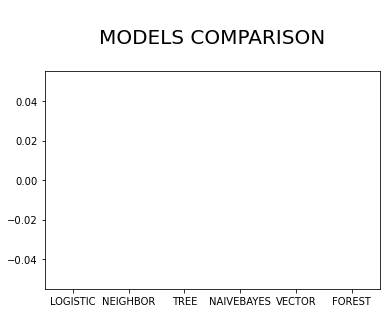

,LOGISTIC,NEIGHBOR,TREE,NAIVEBAYES,VECTOR,FOREST
Accuracy(%),NaN,NaN,NaN,NaN,NaN,NaN
STD,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
results = []
algorithms = []
cv_results_mean = []
cv_results_std = []
for algorith, model in classification_models:
    kfold = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
    cv_results = (cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy'))*100
    results.append(cv_results)
    algorithms.append(algorith)
    cv_results_mean.append(cv_results.mean())
    cv_results_std.append(cv_results.std())

Accuracy_chart_data = [cv_results_mean, cv_results_std]
Accuracy_chart = pd.DataFrame(Accuracy_chart_data, columns = algorithms, index = ['Accuracy(%)', 'STD'])
  
plt.boxplot(results, labels = algorithms)
plt.title('\nMODELS COMPARISON\n'.upper(), loc='center', fontsize = 20)
plt.show()

Accuracy_chart

# **Training the Logistic Regression algorithm**

**Tokenisation**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

#convert a collection of text to a matrix of words
model = make_pipeline(TfidfVectorizer(), LogisticRegression(solver='liblinear', multi_class='ovr'))

In [15]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions)*100, '% accuracy score')

95.34648457258473 % accuracy score


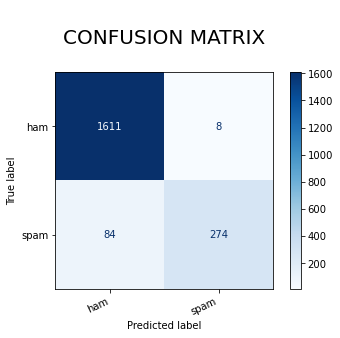

In [16]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
plt.xticks(rotation = 25, horizontalalignment = 'right')
plt.title('\nCONFUSION MATRIX\n'.upper(), loc = 'center', fontsize = 20)
plt.show()

In [17]:
from sklearn.metrics import classification_report

In [18]:
print('CLASSIFICATION REPORT:\n', classification_report(y_test, predictions))

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1619
        spam       0.97      0.77      0.86       358

    accuracy                           0.95      1977
   macro avg       0.96      0.88      0.91      1977
weighted avg       0.95      0.95      0.95      1977



In [19]:
pred_val_comp = np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1)
pred_val_comp = pd.DataFrame(pred_val_comp, columns = ['Predictions', 'Validation_Set'])
pred_val_comp.head(3)

,Predictions,Validation_Set
0,ham,ham
1,ham,ham
2,ham,ham


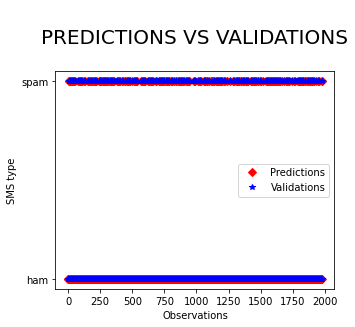

In [20]:
plt.figure(figsize=(5,4))
plt.plot(pred_val_comp.Predictions, 'rD')
plt.plot(pred_val_comp.Validation_Set, 'b*')
plt.xlabel('Observations')
plt.ylabel('SMS type')
plt.legend(['Predictions', 'Validations'], loc='best')
a = plt.title('\nPREDICTIONS vs VALIDATIONS\n'.upper(), loc='center', fontsize = 20)

Prediction with real SMS

In [21]:
train = np.stack((X_train, y_train))
def predict_SMS(sms, train=train, model=model):
    pred = model.predict([sms])
    return pred[0]

In [22]:
#real_sms = predict_SMS('Your AIB online access is suspended due to unusual activity. To restore access please follow the steps via: https://securemobileaibapp.com')
#print(real_sms)

ham


# **GUI**

In [24]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from PIL import Image
import requests
from io import BytesIO
### CREATE VIRTUAL DISPLAY ###
#!apt-get install -y xvfb # X Virtual Frame Buffer Installation
import os

In [25]:
os.system('Xvfb :1 -screen 0 1600x1200x16  &')   # virtual display [1600x1200] 16 bit color (can be 8, 16, 24)
os.environ['DISPLAY']=':1.0'    # request X clients to use virtual DISPLAY :1.0.

In [39]:
# VERSION 3.0
import sys
try:
    # python 2.x
    from Tkinter import * #import Tkinter as tk
except ImportError:
    # python 3.x
    from tkinter import * #import tkinter as tk

# Pillow library (Images)
from PIL import Image, ImageTk

def on_resize(event):
  pass
    # resize BG_IMG(Label_SIZE) & update Label IMG
    #BG_.image = ImageTk.PhotoImage(BG_IMG.resize((event.width, event.height), Image.ANTIALIAS))
    #BG_.config(image=BG_.image)

# Define Function for get Value
def detection():
    get_user_sms = msg.get("1.0",'end-1c')
    
    predicted_type = predict_SMS(get_user_sms)
    
    output = "The SMS acording with:\n"
    output += "Logistic Regression Model is: \t" + predicted_type

    myTKlabel['text'] = output
    print(get_user_sms)
    
root = Tk()
root.wm_title('            SMS SPAM DETECTION            ')

HEIGTH = 550#700
WIDTH = 400
BG_color = 'black'

root.geometry('{}x{}'.format(WIDTH, HEIGTH))
BG_ = Label(root, 
            bg=BG_color,
           )
BG_.place(x=0, y=0, relwidth=1, relheight=1) # make label l to fit the parent window always

# TITLE
title = Label(
    root,
    text='SMS SPAM DETECTION',
    relief=SUNKEN,
    fg='gold',
    bg=BG_color,
    font=("Helvetica", 14, 'underline'),
    borderwidth=0
    )
title.pack(pady = 25, ipadx=0, ipady=0)

# INPUT MSG
msg = Text(root, height = 5, width = 45)#, width=40)
msg.pack()
msg.insert('1.0', 'Enter SMS Here...')

# LABEL: OUTPUT AREA (SPAM | HAM)
myTKlabel = Label(root, text='?', fg='green', bg='white', font=("Helvetica", 12),
                  borderwidth=4, relief="raised", height=15, width=39,
                  )
myTKlabel.pack(pady = 10, ipadx=0, ipady=0)

# BUTTON: DETECT CLASSIFY|DETECT SPAM
BTN_ = Button(root, height=1, width=30, text="CLASSIFY", command = detection, bg="green", fg="white",
            font=("Helvetica", 14)
             )
BTN_.pack()

root.mainloop()

Your AIB online access is suspended due to unusual activity. To restore access please follow the steps via: https://securemobileaibapp.com


# **Naive Bayes classification**
Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object. 

In [23]:
#create and train the Naive Bayes Clasifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

ValueError: could not convert string to float: 'Your A/C XXXXX301710 Credited INR 45,000.00 on 29/06/17 -Deposited by Cash by SELF . A/C Bal INR 46,599.60'

In [ ]:
#Print the predictiones
print(classifier.predict(X_train))

#Print the actual values
print(y_train.values)
print(y_train)

### Another method that can help us to determinate how good this model is

In [ ]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
#it prints the confusion matrix of the data
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

###Now we see what the model does to a test data

In [ ]:
#Print the predictiones
print(classifier.predict(X_test))

#Print the actual values
print(y_test.values)
print(y_test)

In [ ]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
#it prints the confusion matrix of the data
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

### In the previous cell it is shown that the model on the testing data is not as accurate as it was on the training data with "Accuracy: 0.9836812144212523". It can only go up to 1 which is 100% , still 0.9398 is close enough.

The following step is to gather some information about different columns in our DataFrame. We can do so by using .info(), which basically gives us information about the number of rows, columns, column data types, memory usage, etc. The columns with object dtype are the categorical variables in our dataset.

In [ ]:
print(dataset_spam.info())

In [ ]:
dataset_spam["type"].unique()